In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [25]:
from sklearn import datasets

iris = datasets.load_iris()

In [26]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
X = iris['data']
y = iris['target']
y_labels = iris['target_names']

In [28]:
import pandas as pd
X = pd.DataFrame(X, columns=iris['feature_names'])


In [29]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=24, batch_size=1, verbose=1)

loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/50
120/120 [==============================] - 3s 6ms/step - loss: 0.8552 - accuracy: 0.6000
Epoch 2/50
120/120 [==============================] - 1s 4ms/step - loss: 0.7187 - accuracy: 0.6667
Epoch 3/50
120/120 [==============================] - 1s 6ms/step - loss: 0.6215 - accuracy: 0.6833
Epoch 4/50
120/120 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.7250
Epoch 5/50
120/120 [==============================] - 1s 5ms/step - loss: 0.5144 - accuracy: 0.7500
Epoch 6/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7917
Epoch 7/50
120/120 [==============================] - 1s 5ms/step - loss: 0.4540 - accuracy: 0.8083
Epoch 8/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.8250
Epoch 9/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8417
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8583

In [33]:
import networkx as nx


# Assuming you have Ws defined earlier, and Ws[-1] contains W1 and W2
# Define the weight matrices (taken from Ws[-1])
weights = model.weights
# Create a directed graph
G = nx.DiGraph()

pos = {}
# Add nodes for first column
col = 0
print(len(weights))
i = 0
z = 0
maxRows = 0
for z in range(len(weights)):
  maxRows = max(maxRows, weights[z].shape[0])
  z += 2

maxRows += 1

while i < len(weights): #gets weights associated with the a column
  w = weights[i]

  for sourceRow in range(w.shape[0]): # gets weights associated with a node
    source_node = 'l_' + str(sourceRow) + '_' + str(col)
    pos[source_node] = (col, maxRows//(w.shape[0] + 1) * (sourceRow + 1) * -5)

    for row in range(w.shape[1]):
      dest_node = 'l_' + str(row) + '_' + str(col+1)
      G.add_edge(source_node, dest_node, weight = w[sourceRow][row])
      pos[dest_node] = (col + 1, maxRows//(w.shape[1] + 1) * (row + 1) * -5)

  i += 2
  col += 1

4


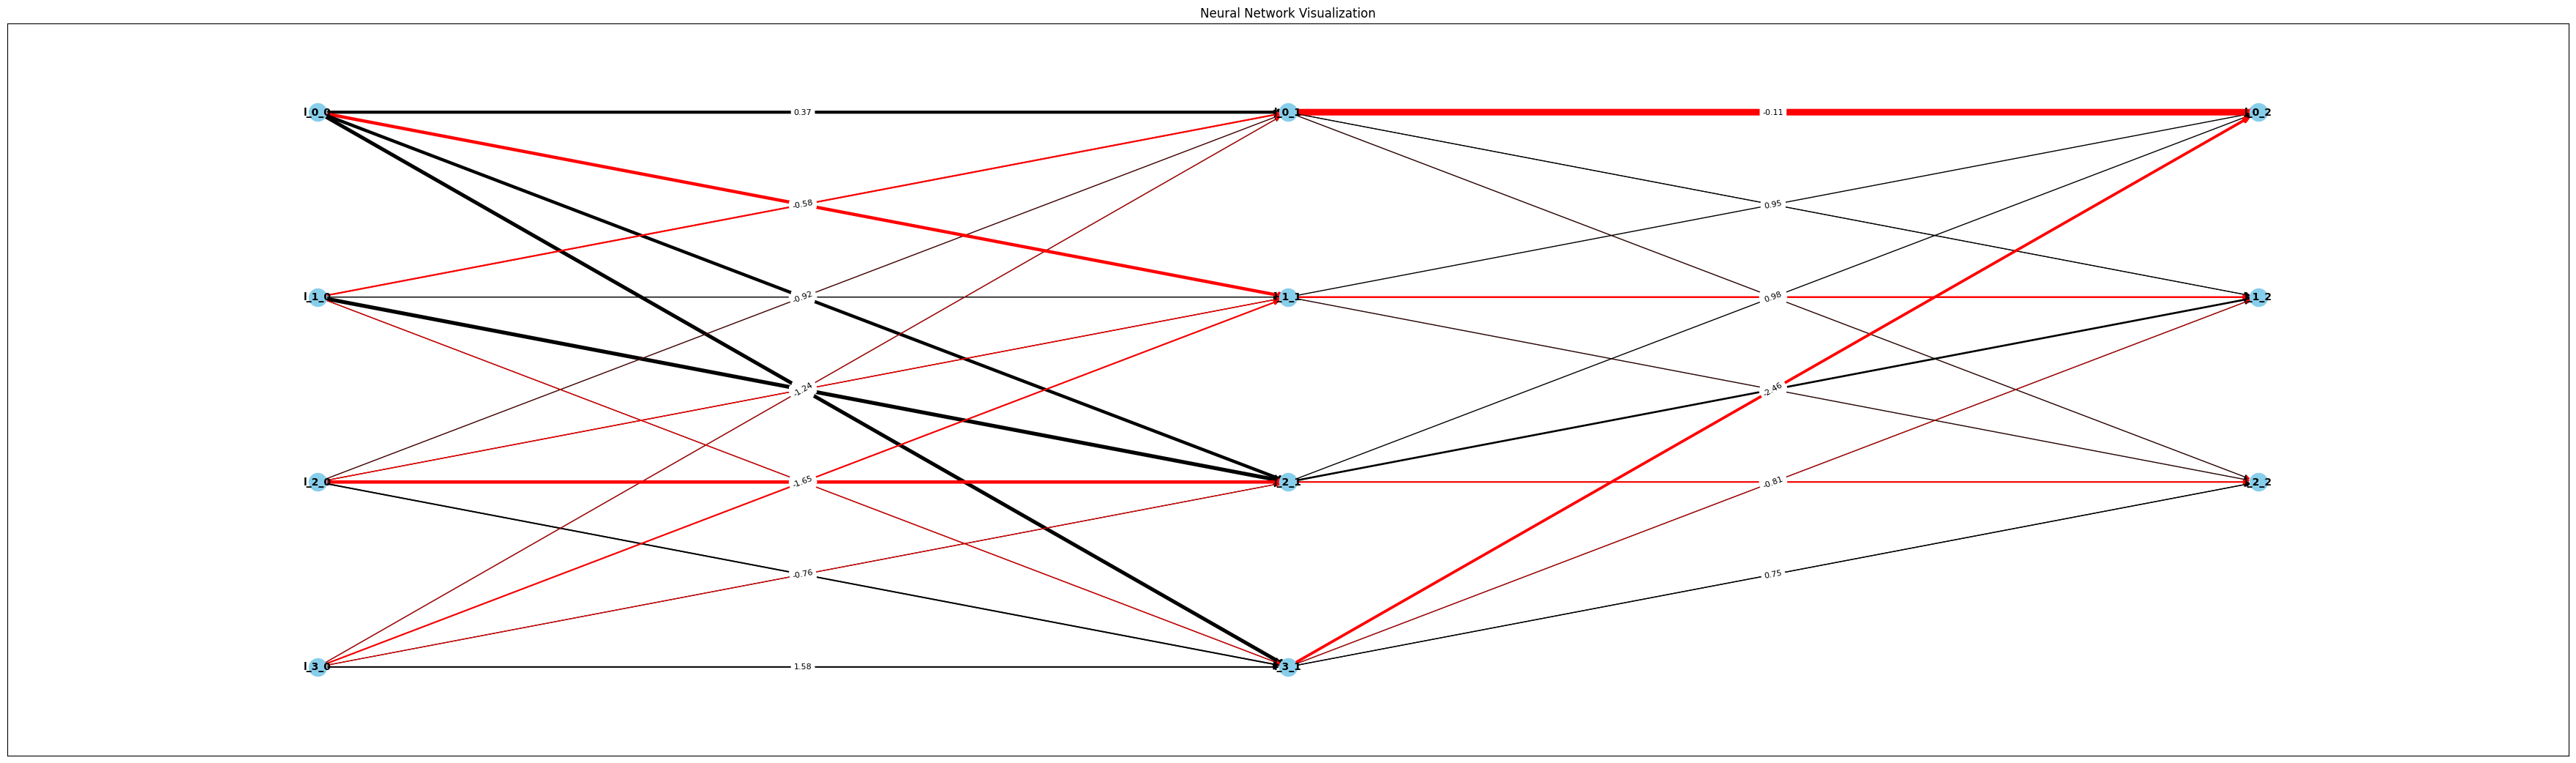

In [34]:
import matplotlib.pyplot as plt
import networkx as nx
import math

edge_colors = []
alpha = []
width = []
for u, v, d in G.edges(data=True):
    # print("Source is", u, "destination is", v, "and weight is", d["weight"])
    if d['weight'] > 0:
        edge_colors.append('black')
        value = (d['weight'] **(3/2))
    else:
        edge_colors.append('red')
        value = (d['weight'] **(3/2))
        # print("stuff happened")
    alpha.append( d['weight'])

    cubed_value = d['weight'] ** 3
    if cubed_value > 0:
        log_of_cubed_value = math.log(cubed_value)  # natural logarithm (base e)
    else:
        cubed_value *= -1
        log_of_cubed_value = math.log(cubed_value)
    width.append(log_of_cubed_value)

plt.figure(figsize=(35, 10))

nx.draw(G, pos=pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, arrows=True, width = width)


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title('Neural Network Visualization')

plt.axis('on')
plt.margins(0.1)

plt.show()

In [35]:
import plotly.graph_objects as go
import networkx as nx
import random

source = []
target = []
weights_list = []
edges = G.edges(data=True)
edges = sorted(edges)
edge_colors = []
# print("Length of edges:", len(edges))
for u, v, d in edges:
  source.append(u)
  target.append(v)
  value = d["weight"].numpy()
  if d["weight"] < 0:
    value = d["weight"].numpy() * -1
    edge_colors.append("black")
  else:
    edge_colors.append("red")
  value = value ** 3
  value = math.log(value, 10)
  weights_list.append((value)**2)

node_to_index = {node: i for i, node in enumerate(sorted(G.nodes))}
print(len(source), len(target), len(weights))
source_index = []
target_index = []


for val in source:
  source_index.append(node_to_index[val])

for val in target:
  target_index.append(node_to_index[val])

# print("Sources:", source_index)

# print("Targets:", target_index)

# print("Indexes:", node_to_index)
link_properties = {
    'source': source_index,
    'target': target_index,
    'value': weights_list,
    'color': edge_colors
}

node_properties = {
    'pad': 15,
    'thickness': 20,
    'line': dict(color="black", width=0.5),
    'label': sorted(G.nodes())
}

sankey_diagram = go.Sankey(node=node_properties, link=link_properties)

fig = go.Figure(data=[sankey_diagram])
fig.update_layout(title_text="Sankey Diagram for Neural Networks", font_size=10)
fig.show()


28 28 4
